# Nutzungsanalyse Garage

In diesem Notebook analysieren wir Garagen.
Nachfolgend importe und settings.

In [10]:
import feature_engineering.garages as grg
import feature_engineering.general as gen

import seaborn as sns
import matplotlib.pyplot as plt

import textwrap
import src.package.importer as im
import src.package.importer_usages as im_usages
import src.package.consts as c

df = im.get_extended_dataset('../package/datasets/full_dataset.csv')
df = im_usages.extract_usage_details(df, highest_only=True, combine_garages=False)

sns.set_theme(style="whitegrid")


## Benchmarks
Nachfolgend einige einfache Benchmarks zu Garagen, geclustert auf Nutzungen.

#### Garage vorhanden pro Hauptnutungstyp
Wieviele Bauten mit einem Hauptnutzungstyp x haben auch eine Garage?

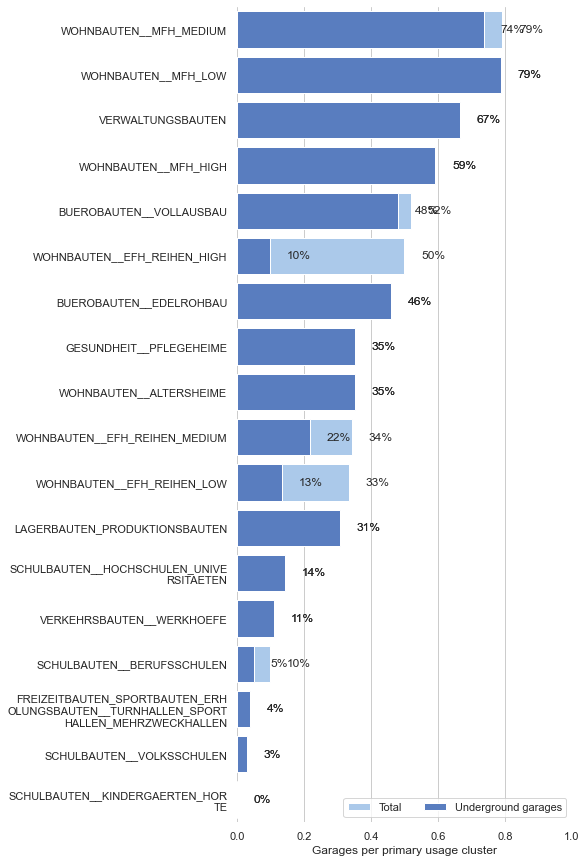

In [11]:
MIN_ITEMS = 10  # minimal num of entries for usage type to be considered
SHOW_MAX = 20  # max largest values to display

garages = grg.garage_count_per_usage(df, ug_garages_separately=True)
garages = gen.drop_lessthan(garages, MIN_ITEMS)
garages = garages[
    [c.NOM_PRIMARY_USAGE,
     c.OBJECTS_WITH_GARAGES_PER_MAIN_USAGE,
     c.OBJECTS_WITH_GARAGES_UG_PER_MAIN_USAGE]]
garages = garages.drop_duplicates(c.NOM_PRIMARY_USAGE)
garages = garages.nlargest(SHOW_MAX, c.OBJECTS_WITH_GARAGES_PER_MAIN_USAGE)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total garages
sns.set_color_codes("pastel")
sns.barplot(x=c.OBJECTS_WITH_GARAGES_PER_MAIN_USAGE, y=c.NOM_PRIMARY_USAGE, data=garages,
            label="Total", color="b")

# Plot the garages (total and indoor)
sns.set_color_codes("muted")
sns.barplot(x=c.OBJECTS_WITH_GARAGES_UG_PER_MAIN_USAGE, y=c.NOM_PRIMARY_USAGE, data=garages,
            label="Underground garages", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Garages per primary usage cluster")
sns.despine(left=True, bottom=True)
ax.set_yticklabels([textwrap.fill(e, 30) for e in garages[c.NOM_PRIMARY_USAGE]])

# add axis value labels, formatted as percentage
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.05,
            p.get_y() + p.get_height() / 2,
            '{:.0%}'.format(width),
            ha='left',
            va='center')

#### Garage Durchschnitt pro Nutzungstyp

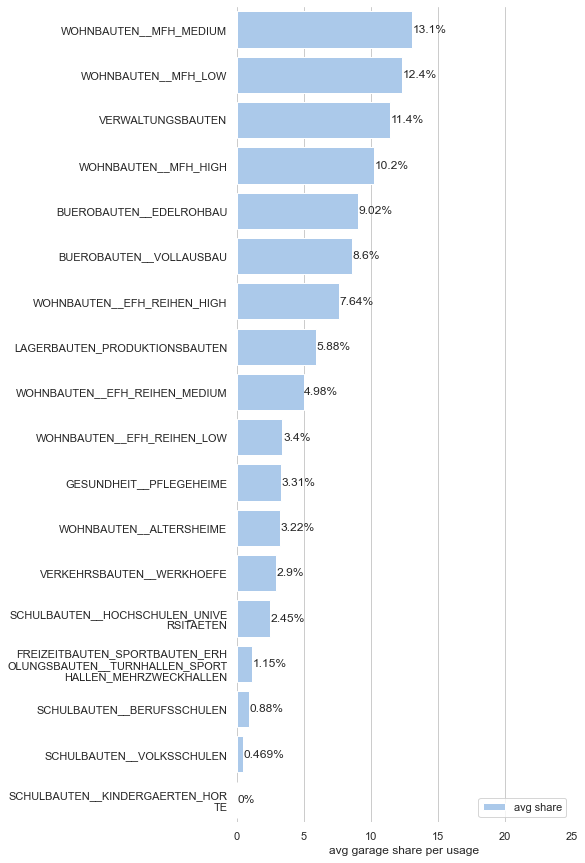

In [12]:
import src.package.consts as fields

garages = grg.garage_avg_per_usage(df)
garages = gen.drop_lessthan(garages, MIN_ITEMS)
garages = garages[
    [fields.FIELD_ID, c.NOM_PRIMARY_USAGE, c.NOM_SECONDARY_USAGE, c.GARAGE_COMBINED_AVG_PERCENTAGE_PER_MAIN_USAGE]]
garages = garages.drop_duplicates(c.NOM_PRIMARY_USAGE)
garages = garages.nlargest(SHOW_MAX, c.GARAGE_COMBINED_AVG_PERCENTAGE_PER_MAIN_USAGE)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total garages
sns.set_color_codes("pastel")
sns.barplot(x=c.GARAGE_COMBINED_AVG_PERCENTAGE_PER_MAIN_USAGE, y=c.NOM_PRIMARY_USAGE, data=garages,
            label="avg share", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 25), ylabel="",
       xlabel="avg garage share per usage")
sns.despine(left=True, bottom=True)
ax.set_yticklabels([textwrap.fill(e, 30) for e in garages[c.NOM_PRIMARY_USAGE]])

# add axis value labels, formatted as percentage
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.05,
            p.get_y() + p.get_height() / 2,
            '{0:.3g}%'.format(width),
            ha='left',
            va='center')